In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data (before enrichment)
df = pd.read_csv('online_shoppers_intention.csv')

# Overview: shape and head
print(f"Shape: {df.shape}")
print("First 5 rows:")
display(df.head())

# Conversion Rate
conv_rate = df['Revenue'].mean()
print(f"Conversion rate (buyers): {conv_rate*100:.2f}%")

# Numeric summary
display(df.describe())

# Categorical summaries
print("\nVisitorType counts:\n", df['VisitorType'].value_counts())
print("\nMonth counts:\n", df['Month'].value_counts())
print("\nWeekend counts:\n", df['Weekend'].value_counts())


Shape: (12330, 18)
First 5 rows:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Conversion rate (buyers): 15.47%


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000



VisitorType counts:
 VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

Month counts:
 Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Weekend counts:
 Weekend
False    9462
True     2868
Name: count, dtype: int64


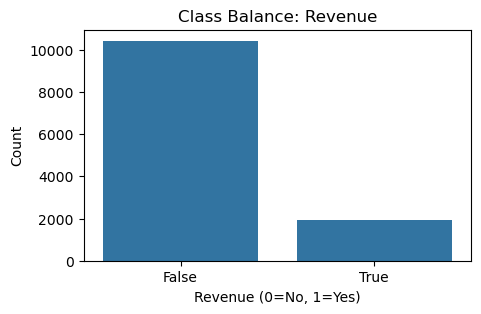

In [7]:
# Revenue (Target) Distribution
plt.figure(figsize=(5,3))
sns.countplot(x='Revenue', data=df)
plt.title('Class Balance: Revenue')
plt.xlabel('Revenue (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


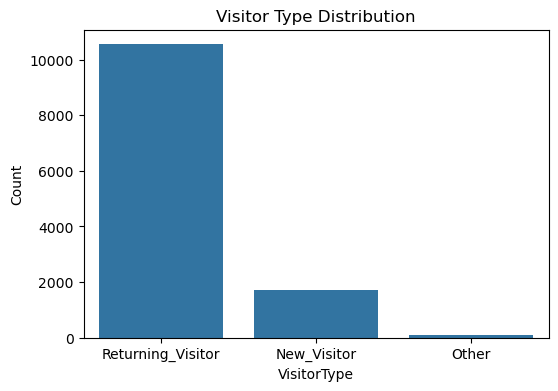

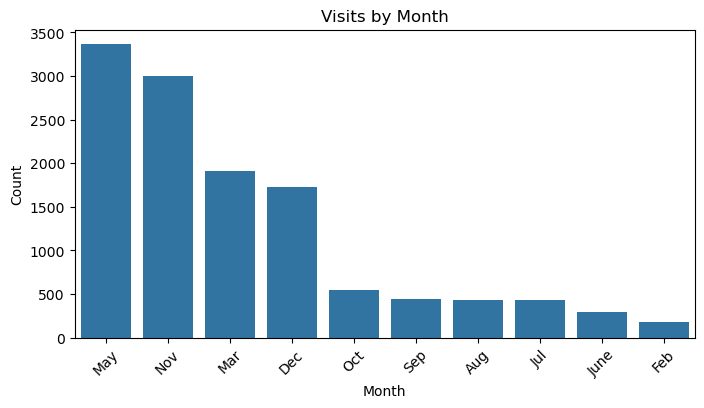

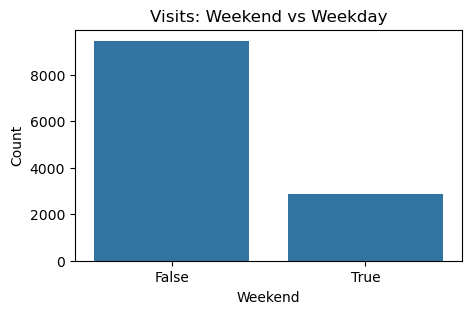

In [8]:
# Visitor Type
plt.figure(figsize=(6,4))
sns.countplot(x='VisitorType', data=df, order=df['VisitorType'].value_counts().index)
plt.title('Visitor Type Distribution')
plt.ylabel('Count')
plt.show()

# Month
plt.figure(figsize=(8,4))
sns.countplot(x='Month', data=df, order=df['Month'].value_counts().index)
plt.title('Visits by Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Weekend
plt.figure(figsize=(5,3))
sns.countplot(x='Weekend', data=df)
plt.title('Visits: Weekend vs Weekday')
plt.ylabel('Count')
plt.show()


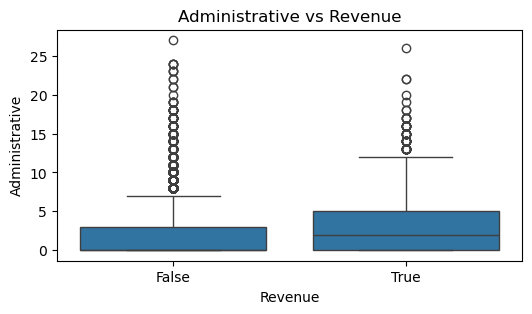

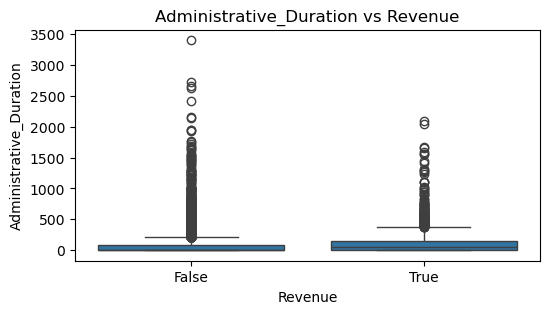

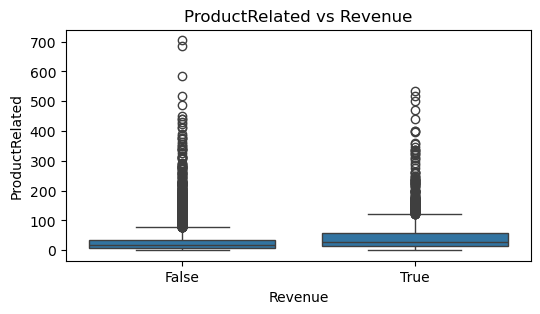

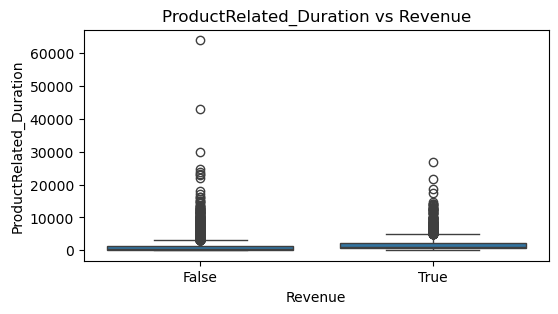

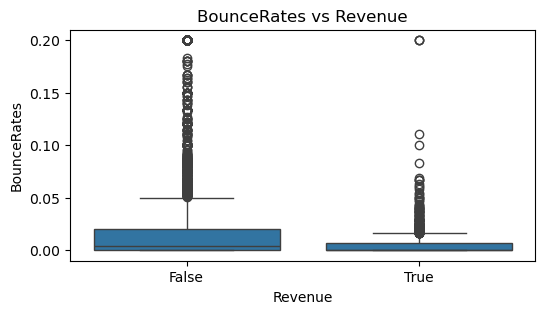

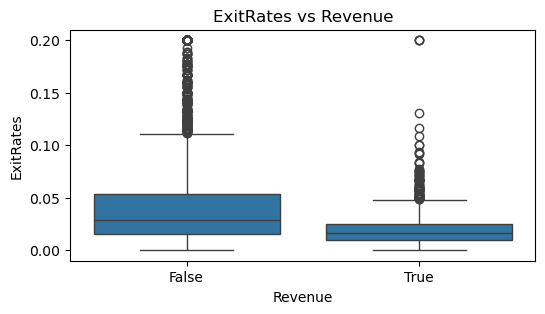

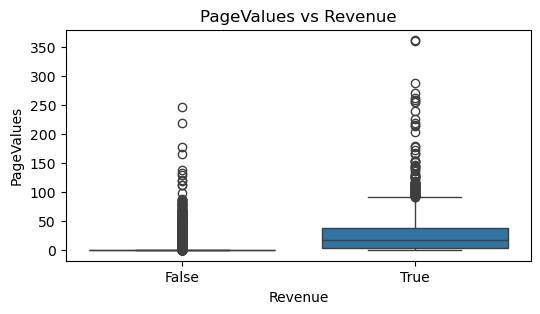

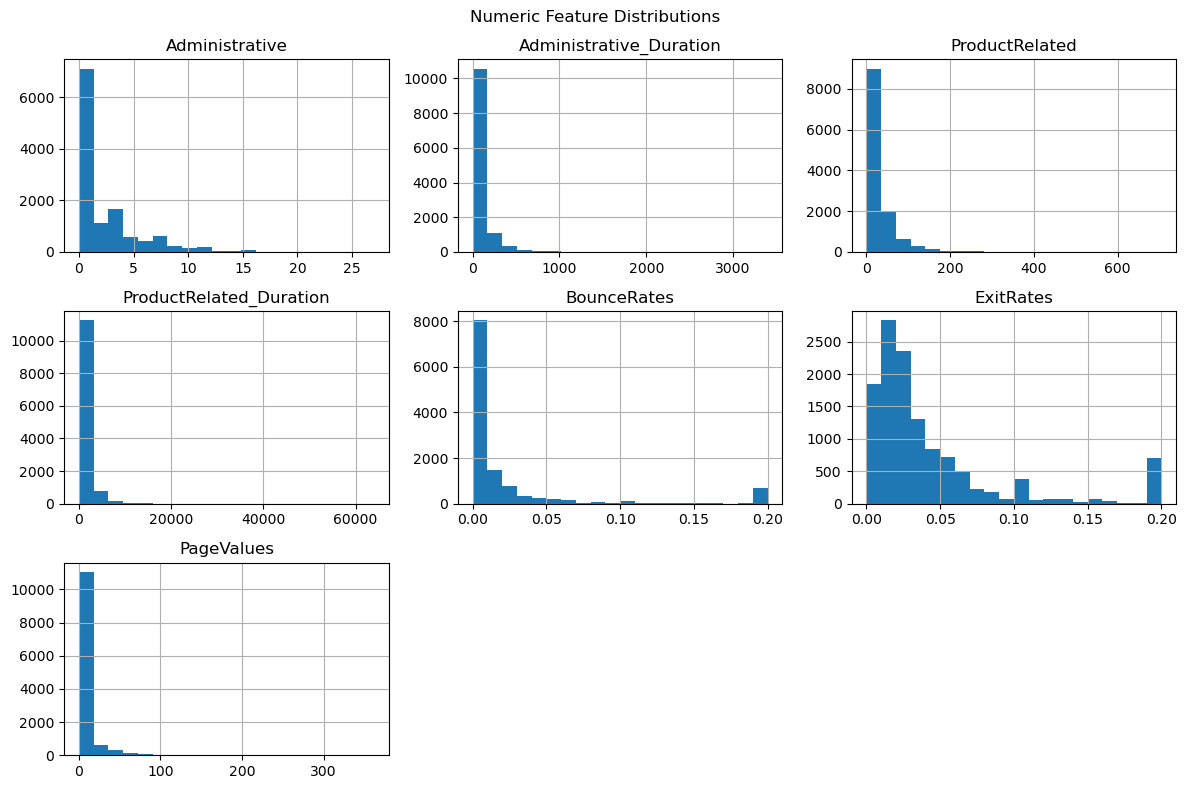

In [9]:
# Boxplots for key numeric features
num_cols = ['Administrative', 'Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Revenue', y=col, data=df)
    plt.title(f'{col} vs Revenue')
    plt.show()

# Histograms for numeric features
df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle('Numeric Feature Distributions')
plt.tight_layout()
plt.show()


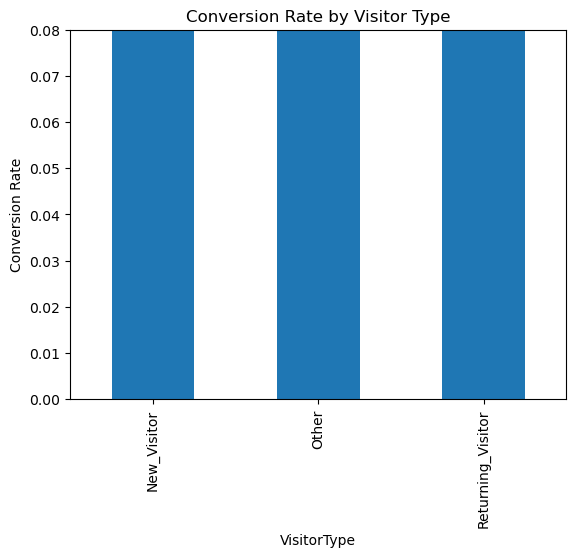

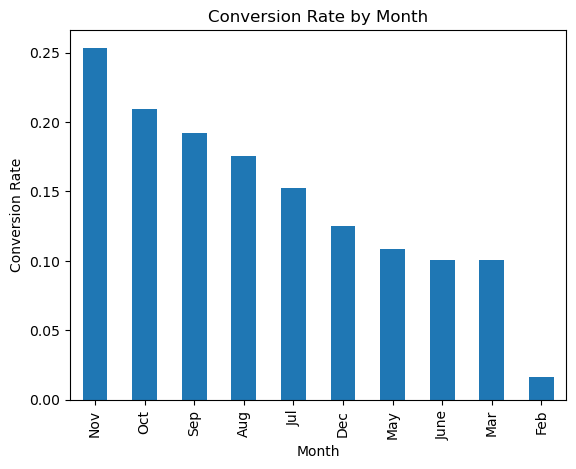

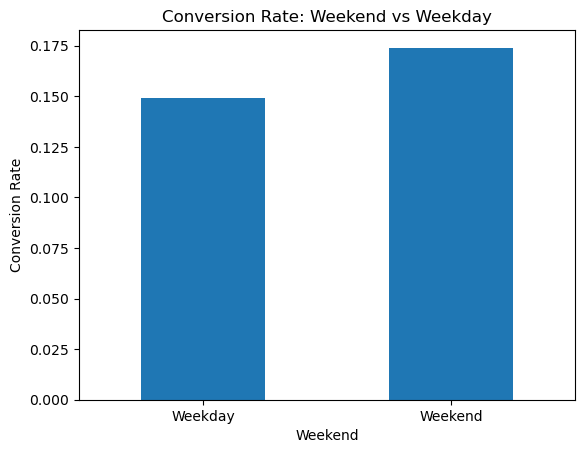

In [10]:
# Conversion rate by VisitorType
vis_conv = df.groupby('VisitorType')['Revenue'].mean()
vis_conv.plot(kind='bar')
plt.title('Conversion Rate by Visitor Type')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.08)
plt.show()

# Conversion rate by Month
month_conv = df.groupby('Month')['Revenue'].mean().sort_values(ascending=False)
month_conv.plot(kind='bar')
plt.title('Conversion Rate by Month')
plt.ylabel('Conversion Rate')
plt.show()

# Conversion rate by Weekend
weekend_conv = df.groupby('Weekend')['Revenue'].mean()
weekend_conv.plot(kind='bar')
plt.title('Conversion Rate: Weekend vs Weekday')
plt.ylabel('Conversion Rate')
plt.xticks([0,1], labels=['Weekday', 'Weekend'], rotation=0)
plt.show()
